# The Graph Isomorphism Problem
***

# Introduction

In this notebook I will discuss the problem associated with graph isomorphism.
Before I do, here are the main keywords that will present themselves throughout the notebook.

Vertex: a vertex is a point where two or more curves, lines or edges meet. As a consequence the point where two lines meet to form an angle is called vertices.

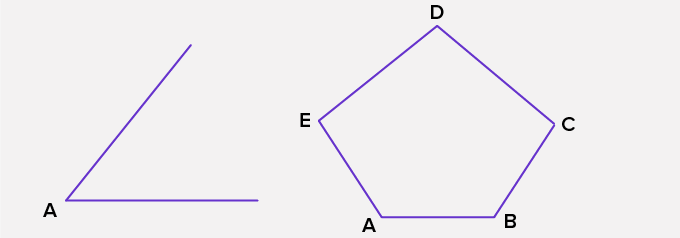

For example, in the above figure, points A, B, C, D, and E are vertices. [[1]](https://www.splashlearn.com/math-vocabulary/geometry/vertex#:~:text=Vertex%20is%20a%20point%20on,of%20a%20vertex%20is%20vertices.)

Edges: Are the set of lines which are interconnected by vertices [[2]](https://www.tutorialspoint.com/edges-and-vertices-of-graph)

Graph: A graph can be defined as a pictorial representation or a diagram that represents data or values in an organised manner. 



# Graph Isomorphism

The isomorphism graph can be described as a graph in which a single graph can have more than one form. That means two different graphs can have the same number of edges, vertices, and same edges connectivity. These types of graphs are known as isomorphism graphs.

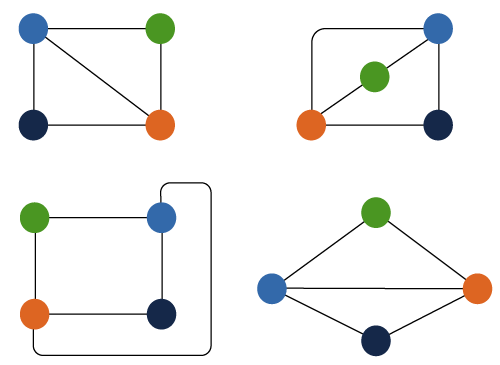

The above figure is the same graph represented in more than one form, hence we can say that these graphs are isomorphism graphs.[[3]](https://www.javatpoint.com/graph-isomorphism-in-discrete-mathematics#:~:text=The%20isomorphism%20graph%20can%20be,are%20known%20as%20isomorphism%20graphs.)

So the problem we are looking at is to determine whether two finite graphs are isomorphic.


# The Graph Isomorphism Problem

The graph isomorphism problem is the computational problem of determining whether two finite graphs are isomorphic. Which you can see is true for the figure in the previous section.
The problem is not known to be solvable in polynomial time nor to be NP-complete, and therefore may be in the computational complexity class NP-intermediate. [[4]](https://en.wikipedia.org/wiki/Graph_isomorphism_problem)
In computational complexity theory, a complexity class is a set of computational problems of related resource-based complexity. The two most commonly analyzed resources are time and memory. [[5]](https://en.wikipedia.org/wiki/Complexity_class)

The study of the relationships between complexity classes is a major area of research in theoretical computer science. However, many relationships are not yet known; for example, one of the most famous open problems in computer science concerns whether P equals NP. P versus NP is one of the great interests to people working with computers and in mathemathics. One way of asking it is, "Can every solved problem whose answer can be checked quickly by a computer, also be quickly solved by a computer?". Math problems are referred to as P or NP, whether they are solvable in finite polynomial time. P problems have their solution time bound to a polynomial and so are relatively fast for computers to solve, and so are considered "easy". NP problems are fast (and so "easy") for a computer to check, but are not necessarily easy to solve. [[6]](https://simple.wikipedia.org/wiki/P_versus_NP_problem)

This problem is one of the Millenium problems, which are 7 big math problems that if answered, could bring change all over math and science education. Whoever solves any of the Millenium problems also wins a million dollars and potentially a Nobel prize. [[7]](https://simple.wikipedia.org/wiki/Millennium_Prize_Problems)

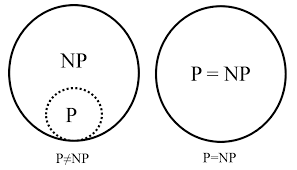

# Implementing Graph Isomorphism

Any two graphs will be known as isomorphism if they satisfy the following four conditions:

* There will be an equal number of vertices in the given graphs.
* There will be an equal number of edges in the given graphs.
* There will be an equal amount of degree sequence in the given graphs.
* If the first graph is forming a cycle of length k with the help of vertices {v1, v2, v3, …. vk}, then another graph must also form the same cycle of the same length k with the help of vertices {v1, v2, v3, …. vk}. [[3]](https://www.javatpoint.com/graph-isomorphism-in-discrete-mathematics#:~:text=The%20isomorphism%20graph%20can%20be,are%20known%20as%20isomorphism%20graphs)

The following python code has the function “brute_force_test_graph_isomorphism”, which accepts as an arguments 2 adjacency matrix and returns True or False whether graphs are isomorphic or not. The detail of the code is explained below. [[8]](https://tonicanada.medium.com/brute-force-code-for-isomorphisms-1241ef180570)

In [1]:
import itertools
import numpy as np


def get_graph_order(adj_matrix):
    if len(adj_matrix) != len(adj_matrix[0]):
        return -1
    else:
        return len(adj_matrix)


def get_degree_sequence(adj_matrix):
    degree_sequence = []
    for vertex in range(len(adj_matrix)):
        degree_sequence.append(sum(adj_matrix[vertex]))
    degree_sequence.sort(reverse=True)
    return degree_sequence


def get_all_vertex_permutations(adj_matrix):
    if get_graph_order(adj_matrix) > 8:
        print("This function is too inefficient for graph order > 8")
        return -1
    all_adj_matrix = []
    idx = list(range(len(adj_matrix)))
    possible_idx_combinations = [
        list(i) for i in itertools.permutations(idx, len(idx))
    ]
    for idx_comb in possible_idx_combinations:
        a = adj_matrix
        a = a[idx_comb]
        a = np.transpose(np.transpose(a)[idx_comb])
        all_adj_matrix.append({
            "perm_vertex":
            idx_comb,
            "adj_matrix":
            a
        })

    return all_adj_matrix


def brute_force_test_graph_isomporphism(adj_1, adj_2):
    degree_sequence_1 = get_degree_sequence(adj_1)
    degree_sequence_2 = get_degree_sequence(adj_2)
    if get_graph_order(adj_1) != get_graph_order(adj_1):
        return False
    elif np.array_equal(degree_sequence_1, degree_sequence_2) == False:
        return False
    else:
        for adj_matrix in list(
                map(lambda matrix: matrix["adj_matrix"],
                    get_all_vertex_permutations(adj_2))):
            if np.array_equal(adj_1, adj_matrix) == True:
                return True
    return False

As an example we check if the following 2 graphs are isomorphic.

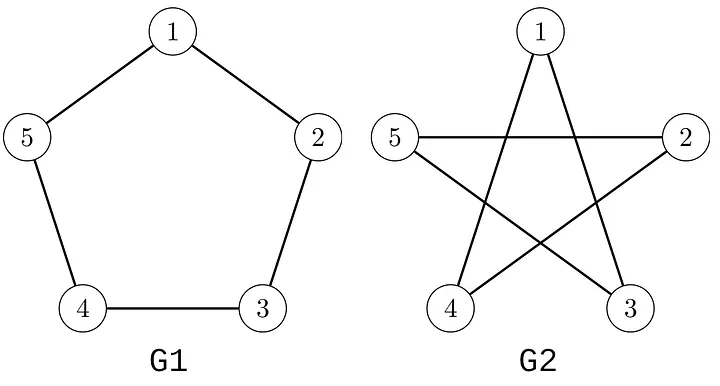

With the following adjacency matrix:

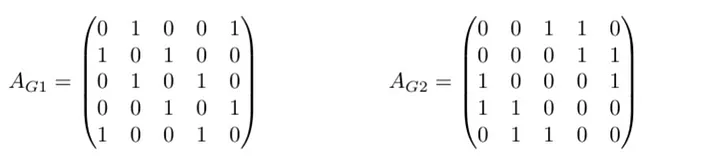

The code checks first if the graph order of both graphs is equal (using get_graph_order function), if that’s not the case, graphs are not isomorphic. 

The next step is check the degree sequence is also equal: degree_sequence_G1 = degree_sequence_G2 = (2, 2, 2, 2, 2).

Finally, if these two checks are passed, then comes the hardest part. The code will use the function get_all_vertex_permutations to generate all the possible vertex permutations for the AG2 and compare if there is one of them that is equal to AG1. In our example, since there are 5 vertex, there are 5! (120) possible permutations to check. For the example, G1 and G2 are isomorphic, so brute_force_test_graph_isomporphism will return True.

# References

SplashLearn: Vertix Definition https://www.splashlearn.com/math-vocabulary/geometry/vertex#:~:text=Vertex%20is%20a%20point%20on,of%20a%20vertex%20is%20vertices. [1]

Tutorialspoint Edges and Vertices https://www.tutorialspoint.com/edges-and-vertices-of-graph [2]

JavaTPoint Graph Isomorphism https://www.javatpoint.com/graph-isomorphism-in-discrete-mathematics#:~:text=The%20isomorphism%20graph%20can%20be,are%20known%20as%20isomorphism%20graphs. [3]

Wikipedia Graph isomorphism problem https://en.wikipedia.org/wiki/Graph_isomorphism_problem [4]

Wikipedia Complexity Class https://en.wikipedia.org/wiki/Complexity_class [5]

Wikipedia P versus NP https://simple.wikipedia.org/wiki/P_versus_NP_problem [6]

Wikipedia Millenium prize problems https://simple.wikipedia.org/wiki/Millennium_Prize_Problems [7]

Medium Brute force code for isomorphisms https://tonicanada.medium.com/brute-force-code-for-isomorphisms-1241ef180570 [8]
